<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Projects // German Credit Risk</font></h1>

# <font color="Orange">01. Introduction

**<font color="Blue">1.1. Background**

The background of this final project is to predict which characteristics drive a person to be good or bad at default. We are using a dataset of German Credit Risk with Target that availabe at https://www.kaggle.com/kabure/german-credit-data-with-risk?select=german_credit_data.csv.

**<font color="Blue">1.2 Content**

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The dataset consist of selected attributes as per below:

1. Age (numeric) 
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
10. Risk (Value target - Good or Bad Risk)
    
**<font color="Blue">1.3. Purpose**
    
By carrying out this analysis and classification of data, we hope that we could found out the proper model to analyze the data among these models:
1. Logistic Regression
2. Naive Bayes
3. KNN
4. SVM
5. Decision Tree	
6. Random Forest	

# <font color="Orange">02. Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from six import StringIO
from sklearn import tree
import pydotplus
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import joblib

plt.style.use("ggplot")

# <font color="Orange">03. Data Loading & Exploratory

**<font color="Blue">3.1. Import Dataset**

In [2]:
df_credit = pd.read_csv("dataset/german_credit_data.csv",sep=",",index_col=0)
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


**<font color="Blue">3.2. Type of Data**
    
Searching for missing type of data and also known the shape of data

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
df_credit.shape

(1000, 10)

**<font color="Blue">3.3. Looking unique values**

In [5]:
df_credit.nunique

<bound method DataFrame.nunique of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4

In [6]:
df_num = df_credit[['Age','Job','Credit amount','Duration']]
df_cat = df_credit[['Sex','Housing','Saving accounts','Checking account','Purpose']]

**<font color="Blue">3.4. Data Exploratory**
    
Let's try some visual using the data

Profile of good and bad debtors

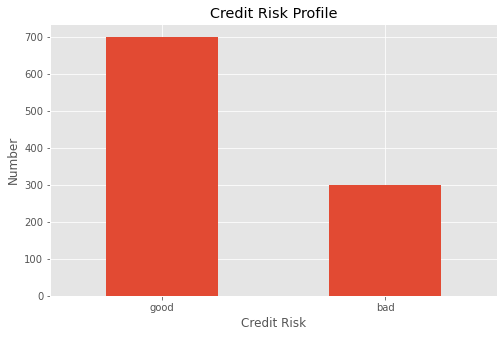

In [7]:
df_credit["Risk"].value_counts().plot(kind="bar", figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Credit Risk Profile") #set title of Bar Chart
plt.ylabel("Number") #set title of Y axis
plt.xlabel("Credit Risk") #set title of X axis
plt.style.use('dark_background')
plt.show()

Observations:

Fro 1000 debtors, 300 debtors are categorized as bad debtors, and fortunately, 700 debtors are categorized as good debtors.

Profile among the applicants with good risk

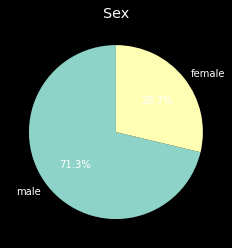

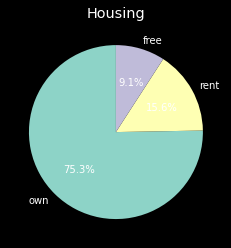

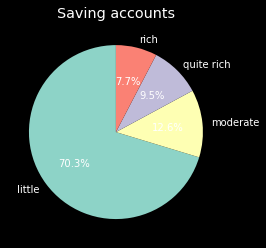

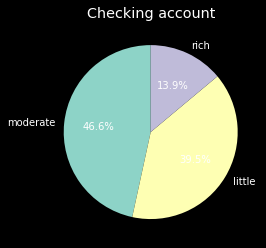

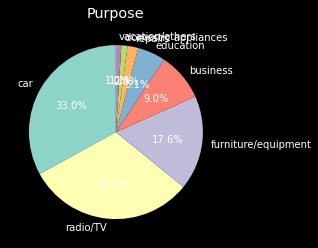

In [8]:
for i in df_cat:
    classLabel = df_credit.loc[df_credit.Risk == 'good'][i].value_counts(normalize=True).index
    plt.pie(df_credit.loc[df_credit.Risk == 'good'][i].value_counts(normalize=True),
            labels = classLabel, startangle=90, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

Observations among the applicants with good risk

In terms of Sex :
71% male, 29% female

In terms of Housing :
75% own , 16% rent , 9% free

In terms of Saving Accounts :
70% little

In terms of Checking Account:
47% moderate

In terms of Purpose :
33% car , 31% radio,TV

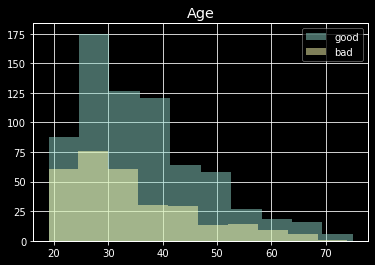

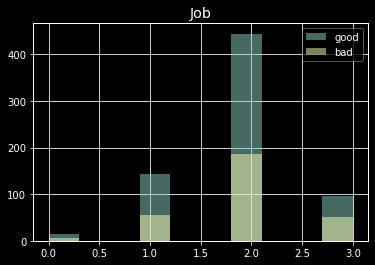

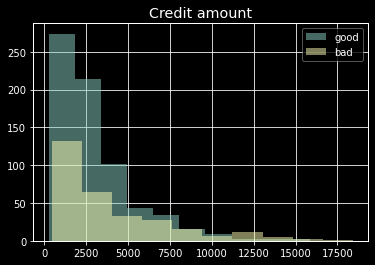

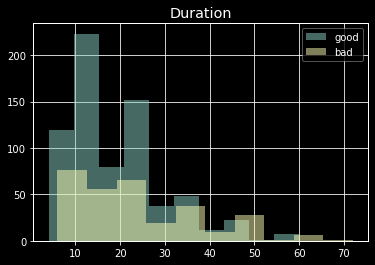

In [9]:
good = df_credit.loc[df_credit['Risk'] == 'good']
bad = df_credit.loc[df_credit['Risk'] == 'bad']
for i in df_num:
    good[i].hist(alpha = 0.5,label='good')
    bad[i].hist(alpha = 0.5,label='bad')
    plt.title(i)
    plt.legend(['good','bad'])
    plt.show()

Observations

The chance of good credit risk is;
- higher for younger applicants
- nearly the same for people with different number of jobs
- decreases as the credit amount increases
- decreases as the credit duration increases

Summary in Pivot

In [10]:
for i in df_cat:
    if(i != 'Purpose'):
        print(pd.pivot_table(df_credit, index = 'Risk',values= 'Purpose', columns = i,aggfunc = 'count'))

Sex   female  male
Risk              
bad      109   191
good     201   499
Housing  free  own  rent
Risk                    
bad        44  186    70
good       64  527   109
Saving accounts  little  moderate  quite rich  rich
Risk                                               
bad                 217        34          11     6
good                386        69          52    42
Checking account  little  moderate  rich
Risk                                    
bad                  135       105    14
good                 139       164    49


# <font color="Orange">04. Prepare the Data [Preprocessing]

**<font color="Blue">4.1. Missing Values**

As previously observe, we found that there are null values in just 2 categories which are Saving Account and Checking account. This values may indicate that these person doesnt have saving or checking account or they may be just a missing value. We need to treat the missing values as another categorical value.

In [11]:
df_credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
df_credit['Checking account'].fillna("No Info", inplace = True) 
df_credit['Saving accounts'].fillna("No Info", inplace = True)

**<font color="Blue">4.2. Split data into training and test set**

To keep the ratio of good and bad applicants are same for both sets, we need to use stratified train test split

In [13]:
# The ratio of good and bad applicants - recall from profile of good and bad debtors
df_credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [14]:
# set dependent and independent values
y = df_credit['Risk']
X = df_credit.drop('Risk',axis = 1)

In [15]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
y_train.value_counts()

good    560
bad     240
Name: Risk, dtype: int64

**<font color="Blue">4.3. Feature Scaling and Pipeline Formation**

In [17]:
num_attribs = ['Age','Job','Credit amount','Duration']
cat_attribs = ['Sex','Housing','Saving accounts','Checking account','Purpose']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ("encoding", OneHotEncoder())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [18]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [19]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# <font color="Orange">05. Model Evaluation

**<font color="Blue">5.1. Logistic Regression**

In [20]:
lr = LogisticRegression(random_state = 42)
y_pred_lr = cross_val_predict(lr,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_lr))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_lr))

Accuracy score: 0.73125
Confusion Matrix
[[ 88 152]
 [ 63 497]]


**<font color="Blue">5.2. Naive Bayes**

In [21]:
nb = GaussianNB()
y_pred_nb = cross_val_predict(nb,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_nb))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_nb))

Accuracy score: 0.6775
Confusion Matrix
[[137 103]
 [155 405]]


**<font color="Blue">5.3. K-Nearest Neighbors**

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5)
y_pred_knn = cross_val_predict(knn,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_knn))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_knn))

Accuracy score: 0.7025
Confusion Matrix
[[ 81 159]
 [ 79 481]]


**<font color="Blue">5.4. Support Vector Machine**

In [23]:
svc = SVC(probability=True,kernel = 'linear', random_state = 42)
y_pred_svc = cross_val_predict(svc,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_svc))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_svc))

Accuracy score: 0.73375
Confusion Matrix
[[ 74 166]
 [ 47 513]]


**<font color="Blue">5.5. Decission Tree**

In [24]:
dt = DecisionTreeClassifier(max_depth = 5,random_state = 42)
y_pred_dt = cross_val_predict(dt,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_dt))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_dt))

Accuracy score: 0.71375
Confusion Matrix
[[ 76 164]
 [ 65 495]]


**<font color="Blue">5.6. Random Forest**

In [25]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
y_pred_rf = cross_val_predict(rf,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_rf))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_rf))

Accuracy score: 0.70375
Confusion Matrix
[[114 126]
 [111 449]]


**<font color="Blue">5.7. Comparison for each model**

In [26]:
Summary = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Naive Bayes" , "KNN", "SVM", "Decision Tree", "Random Forest"],
        "Accuracy Score": [73.1, 67.7, 70.2, 73.3, 71.3, 70.3],
        "False Negative": [152, 103, 159, 166, 164, 126],
        "False Positive": [63, 155, 79, 47, 65, 111],
    },
)
Summary

,Model,Accuracy Score,False Negative,False Positive
0,Logistic Regression,73.1,152,63
1,Naive Bayes,67.7,103,155
2,KNN,70.2,159,79
3,SVM,73.3,166,47
4,Decision Tree,71.3,164,65
5,Random Forest,70.3,126,111


Insight

- Highest Accuracy Score: SVM
- Lowest False Negative: Naive Bayes
- Lowest False Positive: SVM

KNN Test

In [27]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [4, 5, 7] }]

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.669, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.631, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.662, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.625, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.681, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.706, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=7, weights=distance, score=0.688, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.719, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.681, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.744, total=   0.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [4, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [28]:
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [29]:
grid_search.best_score_

0.7162499999999999

In [30]:
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
y_pred_knn = cross_val_predict(knn,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_knn))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_knn))

Accuracy score: 0.71625
Confusion Matrix
[[ 77 163]
 [ 64 496]]


Insight

knn's accuracy rate increased and Type 2 errors decreased.

# <font color="Orange">06. Model Ensamble and Check

**<font color="Blue">6.1. Voting Classifier**

**using all model**

In [31]:
voting_clf = VotingClassifier(estimators = [('lr',lr),
                                            ('nb',nb),
                                            ('knn',knn),
                                            ('svc',svc),
                                            ('rf',rf),
                                            ('dt',dt)], 
                              voting = 'soft') 
y_pred = cross_val_predict(voting_clf,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred))

Accuracy score: 0.73125
Confusion Matrix
[[ 95 145]
 [ 70 490]]


**using top 4 model**

In [32]:
voting_clf2 = VotingClassifier(estimators = [('lr',lr),
                                            ('svc',svc),
                                            ('dt',dt),
                                            ('knn',knn)], 
                              voting = 'soft') 
y_pred = cross_val_predict(voting_clf2,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred))

Accuracy score: 0.74875
Confusion Matrix
[[ 78 162]
 [ 39 521]]


**Checking The accuracy score with Test Set**

In [33]:
voting_clf2 = VotingClassifier(estimators = [('lr',lr),
                                            ('svc',svc),
                                            ('knn',knn),
                                            ('dt',dt)], 
                              voting = 'soft') 
voting_clf2.fit(X_train,y_train)
y_pred = voting_clf2.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.72
Confusion Matrix
[[ 20  40]
 [ 16 124]]


# <font color="Orange">07.Conclusion

72% accuracy rate achieved with soft voting using Logistic Regression, SVC, K-Nearest Neighbors, and Decission Tree.